# Exploratoy analysis of unkown Gaia DR2 dataset

In [7]:
IFrame('https://upload.wikimedia.org/wikipedia/en/0/01/Gaia_spacecraft.jpg', width=600, height=300)

#### Context

I have received a dataset with some entries of an unknown field with Gaia DR2 parameters. I will explore the data set and try to gain some insight on what science can be extracted from the data. The file is in csv format, so I will load it with pandas for exploratory analysis.

First I will load all the required modules

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)


Now I define some global variables

# Download the data
I will use a bash command to download the data and then untar the file. We can do it with bash (nice to show how to use bash code in the notebook), or with python, so we can manage the files in a general way.

In [66]:
%%bash
wget -q http://www.jb.man.ac.uk/~jmoldon/gaia_data.tgz
tar xvfz gaia_data.tgz
#ls -lh gaia_data.csv

gaia_data.csv


In [62]:
download_link = 'http://www.jb.man.ac.uk/~jmoldon/gaia_data.tgz'

In [65]:
def download_file(download_link, force_download=False):
    """
    Use curl to follow a link 'download_link' to get a file 'filename'
    Will not be downloaded if the file already exists
    """
    # Get the name of the file to be downloaded
    filename = os.path.split(download_link)[-1]
    # Check if the file exists and download it otherwise
    if not os.path.isfile(filename) or force_download:
        command = f'wget {download_link}'
        print('Downloading file with command: {}'.format(command))
        os.system(command)
        print(f'Check file is downloaded: {os.path.isfile(filename)}')
    else:
        print('File was already downloaded. Will not download it again')
    return filename

def untar_file(filename):
    command = 'tar xvfz {}'.format(filename)
    print('Running: {}'.format(command))
    os.system(command)
    print('Done')
    
downloaded_file = download_file(download_link)
untar_file(downloaded_file)

Check file is downloaded: True
Running: tar xvfz gaia_data.tgz
Done


# Load the data and preparation

In [44]:
raw_data_file = 'gaia_data.csv'
data = pd.read_csv(raw_data_file)

In [45]:
data['dist'] = 1.0/data['parallax']
positive_parallax = data['parallax'] > 0
data = data[positive_parallax]

In [46]:
data

,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_flux,phot_g_mean_flux_error,dist
0,119.996802,-47.500202,0.921256,0.187591,-10.424669,0.323519,3.736944,0.315300,708.500824,1.438295,1.085475
2,120.006757,-47.500270,0.162781,0.162881,-2.172722,0.282290,9.154361,0.311221,689.905685,1.379819,6.143213
3,119.998885,-47.494844,1.000718,0.291779,-2.141521,0.507015,3.020700,0.545187,367.750620,1.388673,0.999282
4,119.993502,-47.503134,0.259598,0.370288,-1.076661,0.641629,12.968706,0.712446,269.784089,1.092153,3.852105
6,119.995981,-47.494813,0.798124,0.041760,-10.237140,0.078422,16.042646,0.075167,6892.645570,3.577621,1.252938
...,...,...,...,...,...,...,...,...,...,...,...
1799128,123.989817,-45.000053,0.436867,0.039326,-3.655408,0.081952,4.530339,0.070159,9242.493358,4.031784,2.289025
1799129,123.997968,-45.005830,1.105906,0.881937,0.494456,1.314764,0.271186,1.726994,109.378083,0.855285,0.904236
1799130,123.996777,-45.004306,0.039346,0.064425,-2.468605,0.108706,3.370608,0.124752,3447.256484,2.815662,25.415823
1799131,123.999633,-45.005735,4.238819,2.706341,0.899451,2.489911,15.707496,3.768197,88.238926,1.208926,0.235915


In [47]:
data.count()

ra                        1247198
dec                       1247198
parallax                  1247198
parallax_error            1247198
pmra                      1247198
pmra_error                1247198
pmdec                     1247198
pmdec_error               1247198
phot_g_mean_flux          1247198
phot_g_mean_flux_error    1247198
dist                      1247198
dtype: int64

In [48]:
data.isna().count()

ra                        1247198
dec                       1247198
parallax                  1247198
parallax_error            1247198
pmra                      1247198
pmra_error                1247198
pmdec                     1247198
pmdec_error               1247198
phot_g_mean_flux          1247198
phot_g_mean_flux_error    1247198
dist                      1247198
dtype: int64

In [49]:
data.describe()

,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_flux,phot_g_mean_flux_error,dist
count,1.247198e+06,1.247198e+06,1.247198e+06,1.247198e+06,1.247198e+06,1.247198e+06,1.247198e+06,1.247198e+06,1.247198e+06,1.247198e+06,1.247198e+06
mean,1.203846e+02,-4.733084e+01,6.124728e-01,3.625973e-01,-2.601330e+00,6.478138e-01,4.166971e+00,7.455398e-01,1.294422e+04,1.923157e+01,1.502046e+01
std,2.245124e+00,1.435533e+00,7.051588e-01,3.613622e-01,3.858120e+00,6.299318e-01,5.044105e+00,7.972699e-01,9.806939e+05,4.577263e+03,1.528262e+03
min,1.160000e+02,-5.000000e+01,9.255099e-07,1.076615e-02,-2.765533e+02,2.119264e-02,-3.660955e+02,2.066648e-02,7.505079e+01,6.475952e-01,1.941065e-02
25%,1.185546e+02,-4.854983e+01,2.132039e-01,1.080192e-01,-3.723483e+00,1.990565e-01,2.407942e+00,2.072903e-01,1.908293e+02,1.087694e+00,1.322446e+00
50%,1.205490e+02,-4.725285e+01,4.144269e-01,2.464928e-01,-2.253358e+00,4.467973e-01,3.826755e+00,4.715598e-01,4.692695e+02,1.347452e+00,2.412971e+00
75%,1.223350e+02,-4.607537e+01,7.561747e-01,5.003642e-01,-1.180857e+00,8.977320e-01,5.678591e+00,9.803212e-01,1.527592e+03,2.006269e+00,4.690347e+00
max,1.240000e+02,-4.500001e+01,5.151812e+01,4.322231e+00,3.098752e+02,5.273793e+00,6.367272e+02,5.364564e+00,5.061546e+08,3.567650e+06,1.080485e+06


In [50]:
data.agg({'ra' : ['mean', 'min', 'max'], 'dec' : ['mean', 'min', 'max']})

,ra,dec
mean,120.384639,-47.330839
min,116.000010,-50.000000
max,123.999995,-45.000010


### Sky distribution of the stars by magnitude

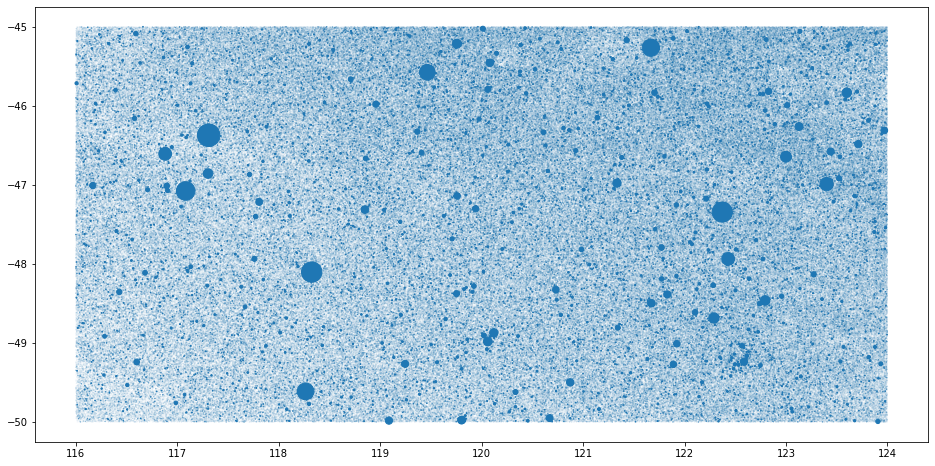

In [51]:
plt.scatter(data['ra'], data['dec'], s=data['phot_g_mean_flux']/1000000.);


[]

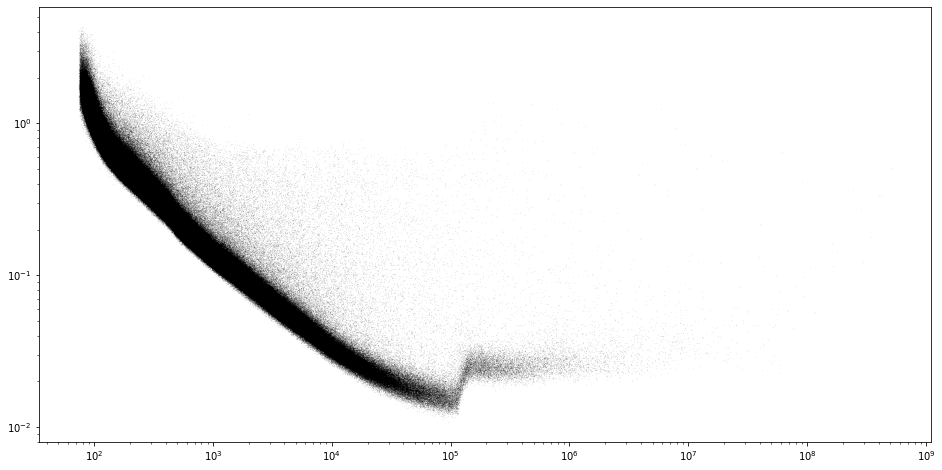

In [52]:
plt.plot(data['phot_g_mean_flux'], data['parallax_error'], '.k', ms=0.1, alpha=0.5)
data_close = data[(data['dist']<0.5)]# & (data['dist']>0.2)]

#l = plt.scatter(data_close['phot_g_mean_flux'], data['parallax_error'], c=data_close['dist'], s=5)
#plt.colorbar(l)
plt.gca().loglog()

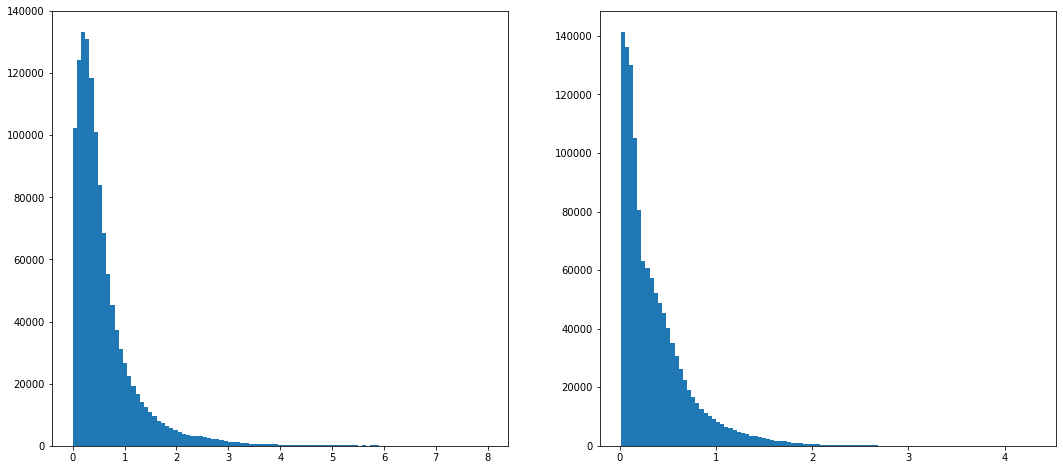

In [53]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].hist(data['parallax'], bins=np.linspace(0, 8, 100));
ax[1].hist(data['parallax_error'], bins=100);

In [55]:
my_sig = 3
good_par = data['parallax']/data['parallax_error'] > my_sig

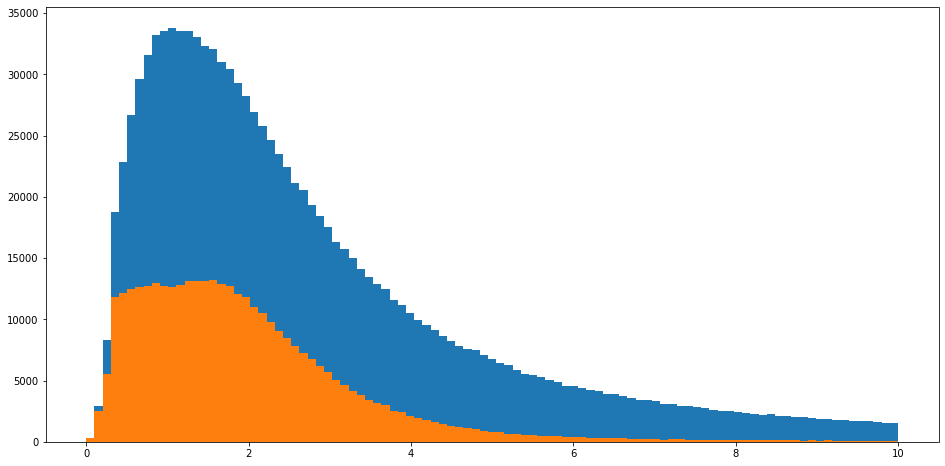

In [56]:
plt.hist(data['dist'], bins=np.linspace(0, 10, 100));
plt.hist(data['dist'][good_par], bins=np.linspace(0, 10, 100));

(0, 2000)

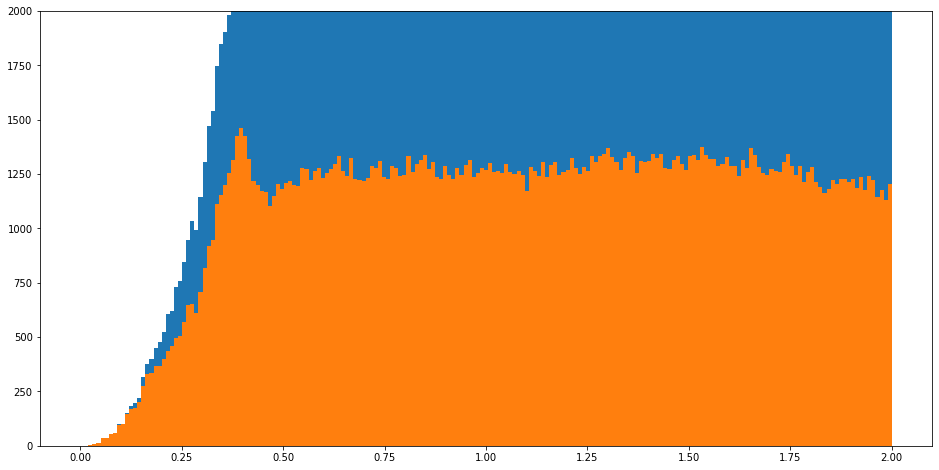

In [57]:
plt.hist(data['dist'], bins=np.linspace(0, 2, 200));
plt.hist(data['dist'][good_par], bins=np.linspace(0, 2, 200));
plt.ylim(0,2000);

In [62]:
group = (data['dist'] > 0.33) & (data['dist'] < 0.45)

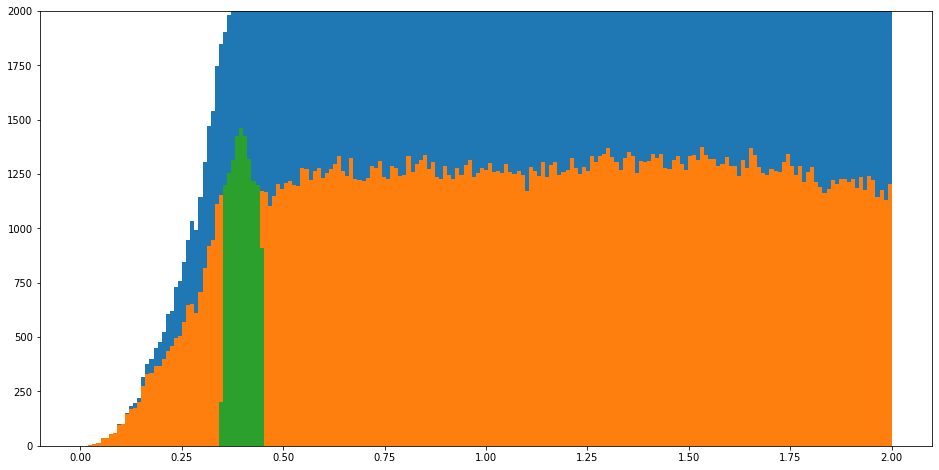

In [61]:
plt.hist(data['dist'], bins=np.linspace(0, 2, 200));
plt.hist(data['dist'][good_par], bins=np.linspace(0, 2, 200));
plt.hist(data['dist'][good_par*group], bins=np.linspace(0, 2, 200));
plt.ylim(0,2000);

In [63]:
cluster = data[good_par*group]

# Analysis of very interesting cluster

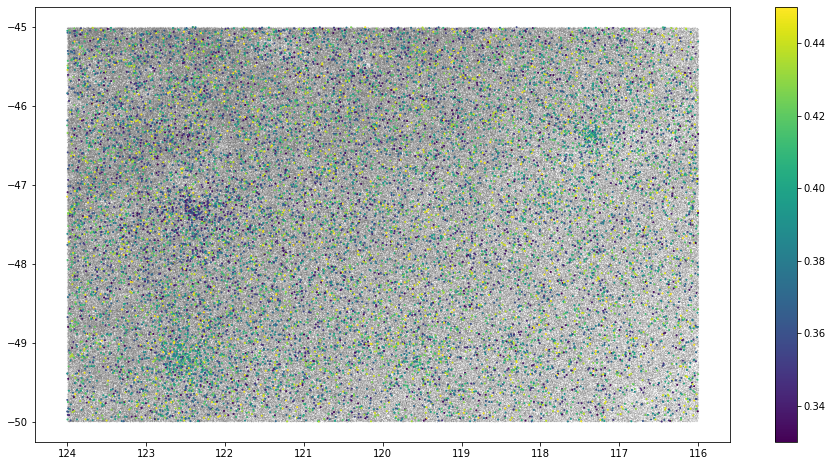

In [88]:
plt.scatter(data['ra'], data['dec'], c='gray', s=0.01, alpha=0.5);
l = plt.scatter(cluster['ra'], cluster['dec'],
            c=cluster['dist'], s=1);
xmax, xmin = plt.gca().get_xlim()
plt.gca().set_xlim(xmin, xmax);
plt.gca().set_aspect('equal');
plt.colorbar(l);

# Velocity distribution analysis

(-20, 40)

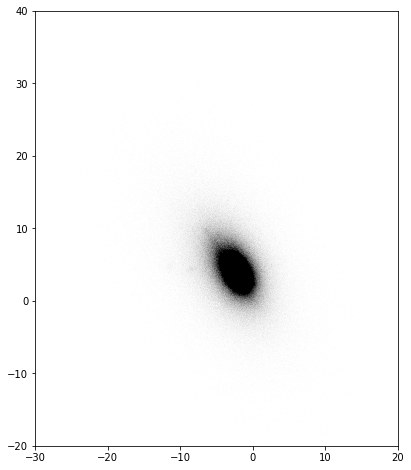

In [66]:
plt.plot(data['pmra'], data['pmdec'], ',k', alpha=0.005)
plt.gca().set_aspect('equal')
plt.xlim(-30, 20)
plt.ylim(-20, 40)

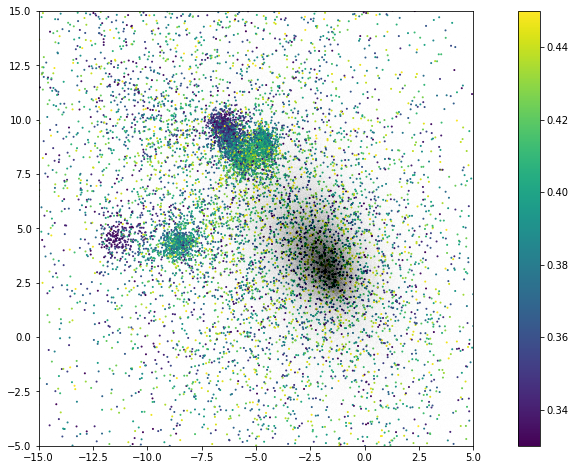

In [68]:
plt.plot(data['pmra'], data['pmdec'], ',k', alpha=0.005)
l = plt.scatter(cluster['pmra'], cluster['pmdec'],
            c=cluster['dist'], s=1)
plt.colorbar(l)
plt.gca().set_aspect('equal')
#plt.xlim(-15, 5);
#plt.ylim(3, 12);
plt.xlim(-15, 5);
plt.ylim(-5, 15);

In [76]:
import seaborn as sns

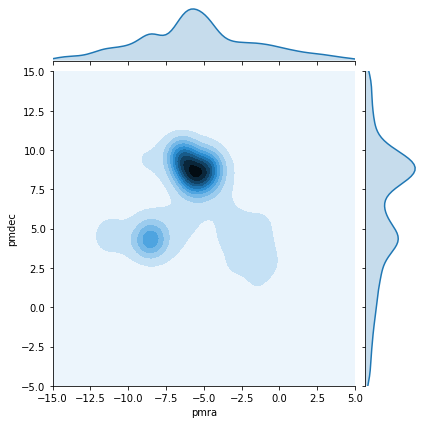

In [92]:
c1a = cluster['pmra'] > -15.0 
c1b = cluster['pmra'] < 5.0
c2a = cluster['pmdec'] > -5.0
c2b = cluster['pmdec'] < 15.0
c = c1a*c1b*c2a*c2b
sns.jointplot(x ='pmra', y ='pmdec', data = cluster[c], kind ='kde', xlim=[-15, 5], ylim=[-5.0, 15.0]); 